In [1]:
import os
os.environ["SPS_HOME"] = "/Users/fpetri/packages/fsps" 

In [2]:
import lbg_forecast.tools as tools
import lbg_forecast.hyperparams as hyp
import numpy as np
import matplotlib.pyplot as plt
import fsps

In [3]:
bounds = hyp.define_hyperparameter_bounds(

    zred = np.array([0, 3.0, 4.5]),
    logtage = np.array([0, np.log10(0.070), np.log10(0.070)]),
    logzsol = np.array([0, np.log10(0.2), np.log10(0.2)]),
    dust1 = np.array([0, 0, 0]),
    dust2 = np.array([0, 0.599, 0.599]),
    igm_factor = np.array([0, 1, 1]), 
    gas_logu = np.array([0, -2, -2]),
    gas_logz = np.array([0, 0, 0]),
    fagn = np.array([0, 0, 0]),
    imf1 = np.array([0, 2.35, 2.35]), 
    imf2 = np.array([0, 2.35, 2.35]), 
    imf3 = np.array([0, 2.35, 2.35]), 
    logtau = np.array([0, -3, -3]),
    loga = np.array([0, 3, 3]),
    logb = np.array([0, -3, -3]),
    logmass = np.array([0, 12, 12])

    )

photo, redshifts = tools.simulate_photometry(ngalaxies=200, bounds=bounds, dust_type=2, imf_type=0, filters='suprimecam')

/Users/fpetri/repos/LBGforecast/lbg_forecast/sfh.py:8: RuntimeWarning: overflow encountered in power
  return ((t/tau)**(a) + (t/tau)**(-b))**(-1)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [4]:
colours = tools.calculate_colours(photo)
print(fsps.find_filter('suprimecam')[1:2]+fsps.find_filter('suprimecam')[3:])
colours

['suprimecam_g', 'suprimecam_r', 'suprimecam_i', 'suprimecam_z']


array([[3.47930383, 1.01847551, 0.16930868],
       [3.43924688, 0.98511059, 0.16735708],
       [3.36440192, 0.92330647, 0.16316298],
       [2.27621941, 0.54057292, 0.14669015],
       [1.76948079, 0.27733348, 0.14021709],
       [3.31782187, 0.89498174, 0.1617909 ],
       [3.28938147, 0.88116275, 0.16070548],
       [4.37317682, 1.39625715, 0.17926853],
       [1.96711555, 0.38050973, 0.1465688 ],
       [4.35304452, 1.38930726, 0.17931943],
       [1.80270035, 0.29479511, 0.14102223],
       [4.40407565, 1.40703039, 0.17928192],
       [1.60294928, 0.20746824, 0.14295779],
       [2.50877907, 0.63207393, 0.14773703],
       [3.37492092, 0.93064324, 0.16401412],
       [3.89799294, 1.22805893, 0.17843015],
       [2.30146597, 0.55158709, 0.14674041],
       [3.83415392, 1.20289801, 0.17782135],
       [1.43515766, 0.1943698 , 0.14446516],
       [1.58687578, 0.20522438, 0.14361624],
       [1.34706699, 0.19002331, 0.14387007],
       [1.61748557, 0.20978321, 0.14286961],
       [2.

(-0.6, 3.4)

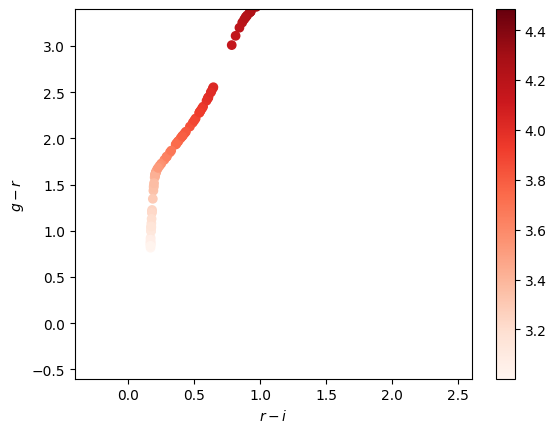

In [8]:
plt.scatter(colours[:,1], colours[:,0], c=redshifts, cmap="Reds")
plt.colorbar()
plt.xlabel("$r - i$")
plt.ylabel("$g - r$")
plt.xlim(-0.4, 2.6)
plt.ylim(-0.6, 3.4)